In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

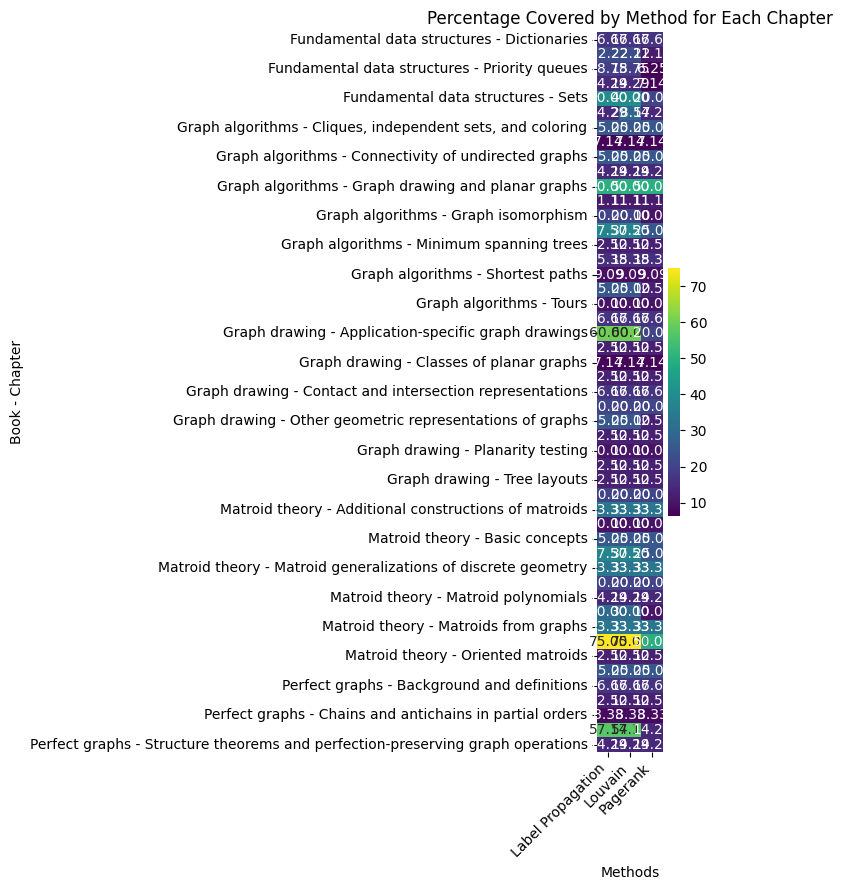

In [2]:
tabular_data = pd.read_csv('full_comparison_data.csv')
tabular_data["Book - Chapter"] = tabular_data["Book"].str.cat(tabular_data["Chapter"], sep=" - ")
tabular_data.describe()

latex_table = tabular_data.to_latex(index=False, column_format="lrr", caption="Comparison of Methods", label="tab:comparison")

# Create a pivot table to show percentage covered for each method by chapter
chapter_method_pivot = tabular_data.pivot(index='Book - Chapter', columns='Methods', values='Percentage Covered')

plt.figure(figsize=(7, 9))
sns.heatmap(chapter_method_pivot, annot=True, cmap='viridis', fmt='.2f')
plt.title('Percentage Covered by Method for Each Chapter')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
tabular_data = pd.read_csv('full_comparison_data.csv')

def create_heatmaps(tabular_data):
    tabular_data["Book - Chapter"] = tabular_data["Book"].str.cat(tabular_data["Chapter"], sep=" - ")
    tabular_data["Methods"] = tabular_data["Methods"].str.replace("Pagerank", "PageRank")

    # Create a pivot table
    chapter_method_pivot = tabular_data.pivot(index=['Book', 'Chapter'], columns='Methods', values='Percentage Covered')

    # Get unique books
    books = tabular_data['Book'].unique()

    # Set a larger font size for all text elements
    plt.rcParams.update({'font.size': 14})

    # Create a heatmap for each book
    for book in books:
        # Filter data for the current book
        book_data = chapter_method_pivot.loc[book]
        
        # Create the plot
        fig, ax = plt.subplots(figsize=(12, len(book_data) * 0.7 + 2))  # Increased figure width and height
        sns.heatmap(book_data, annot=True, cmap='viridis', fmt='.2f', cbar_kws={'label': 'Percentage Covered'}, ax=ax)
        
        ax.set_title(f'Percentage Covered by Method for Each Chapter in {book.capitalize()}', fontsize=16, pad=20)
        ax.set_xlabel('Methods', fontsize=14, labelpad=10)
        ax.set_ylabel('Chapters', fontsize=14, labelpad=10)
        
        # Rotate x-axis labels and adjust their position
        plt.xticks(rotation=45, ha='right')
        ax.xaxis.set_tick_params(labelsize=12)
        ax.yaxis.set_tick_params(labelsize=12)
        
        # Adjust colorbar font size
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=12)
        cbar.set_label('Percentage Covered', fontsize=14)
        
        # Adjust layout and save with high DPI
        plt.tight_layout()
        plt.savefig(f'{book}_heatmap.png', dpi=300, bbox_inches='tight')
        plt.close()  # Close the figure to free up memory

    # Create the overall heatmap
    fig, ax = plt.subplots(figsize=(14, len(chapter_method_pivot) * 0.4 + 2))  # Increased figure width
    sns.heatmap(chapter_method_pivot, annot=True, cmap='viridis', fmt='.2f', cbar_kws={'label': 'Percentage Covered'}, ax=ax)

    ax.set_title('Percentage Covered by Method for Each Chapter (All Books)', fontsize=16, pad=20)
    ax.set_xlabel('Methods', fontsize=14, labelpad=10)
    ax.set_ylabel('Book - Chapter', fontsize=14, labelpad=10)

    # Rotate x-axis labels and adjust their position
    plt.xticks(rotation=45, ha='right')
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)

    # Adjust colorbar font size
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label('Percentage Covered', fontsize=14)

    plt.tight_layout()
    plt.savefig('overall_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()
    
create_heatmaps(tabular_data)

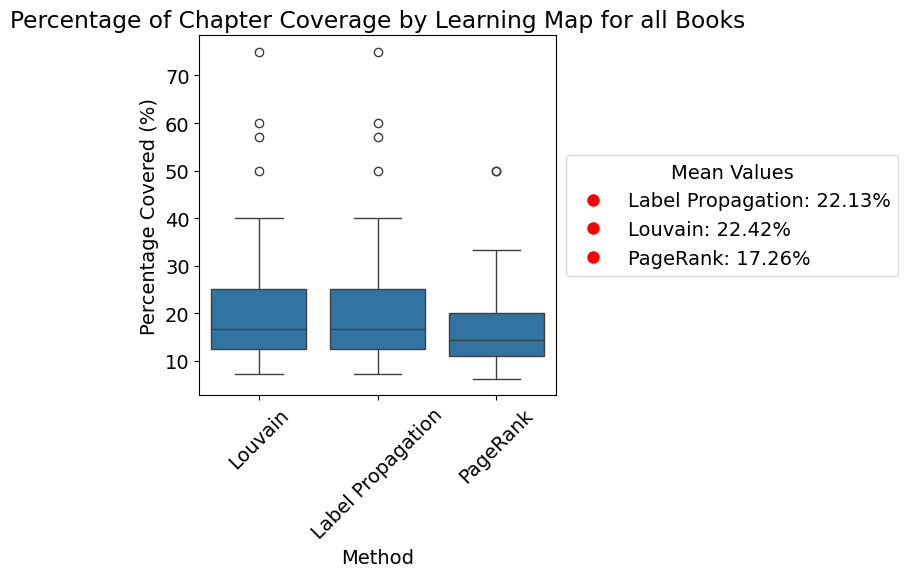

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def create_boxplot_chapter_coverage(tabular_data, title_='Percentage of Chapter Coverage by Learning Map for all Books'):
    tabular_data['Percentage Covered'] = tabular_data['Percentage Covered'].astype(float)

    # Create the box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Methods', y='Percentage Covered', data=tabular_data)

    # Calculate means for each method
    means = tabular_data.groupby('Methods')['Percentage Covered'].mean()

    # Customize the plot
    plt.title(title_)
    plt.xlabel('Method')
    plt.ylabel('Percentage Covered (%)')

    # Create custom legend entries with mean values
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{method}: {value:.2f}%',
                                  markerfacecolor='red', markersize=10)
                       for method, value in means.items()]
    
    # Add legend with mean values outside the plot
    plt.legend(handles=legend_elements, title='Mean Values', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=45)
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

create_boxplot_chapter_coverage(tabular_data)

In [5]:
len(tabular_data["Chapter"].unique())

49

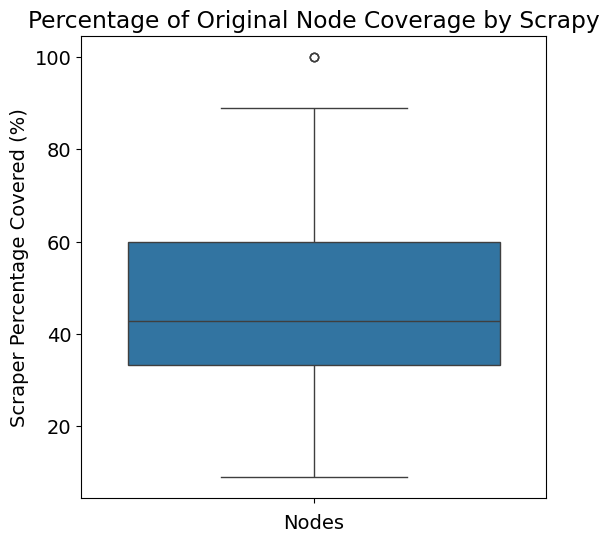

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert percentage to float
tabular_data['Scraper Percentage Covered'] = tabular_data['Scraper Percentage Covered'].astype(float)

# Create the box plot
plt.figure(figsize=(6, 6))
sns.boxplot(tabular_data['Scraper Percentage Covered'])

# Customize the plot
plt.title('Percentage of Original Node Coverage by Scrapy')
plt.xlabel('Nodes')
plt.ylabel('Scraper Percentage Covered (%)')

# Show the plot
plt.show()

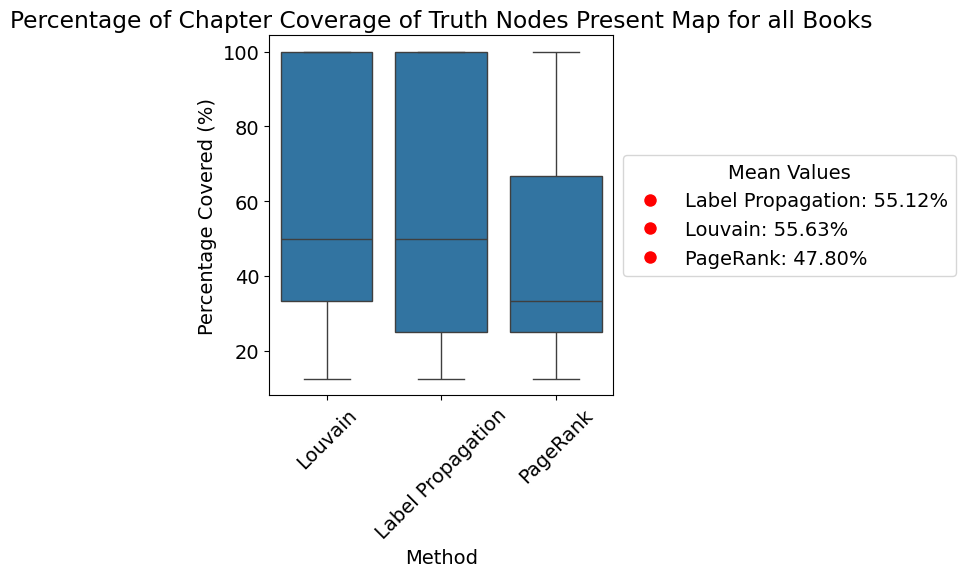

In [7]:
scrapy_modified = tabular_data.copy()
scrapy_modified["Percentage Covered"] = (scrapy_modified["Percentage Covered"] / scrapy_modified["Scraper Percentage Covered"]) * 100

create_boxplot_chapter_coverage(scrapy_modified, title_ = 'Percentage of Chapter Coverage of Truth Nodes Present Map for all Books')